# Instacart Analysis - Part 2 - Project Exercises

## Content List
* Busiest hours of the day
* Busies days of the week
* Time of day customers spend more money
* Price range grouping
* Product Popularity
<br/>
Customer type
* Order frequency by loyalty type
*  Ordering habits by loyalty status
*  Ordering habit by region
*  Is there a connection between age and family status in terms of ordering  habits
*  What different classifications does the demographic information suggest: Age, Income, Product type, family status
*  What are the different ordering statuses of different customer profiles
    

In [1]:
#remember to import everytime you open a new notebook
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create a path
path = r'C:\Users\laura\Documents\Continuting Education\Career Foundry\Python\Python Data Set'

In [5]:
# create a path for the final project
path_client = r'C:\Users\laura\Documents\Continuting Education\Career Foundry\Python\Instacart Basket Analysis'

In [7]:
#import the latest data frame from part 1 of this project
ords_prods_customers_target = pd.read_pickle(os.path.join(path, 'Prepared Data', '4.10_final', 'ords_prods_customers_target'))

## What are the busiest hours of the day

Text(0.5, 0, 'Order Hour of Day')

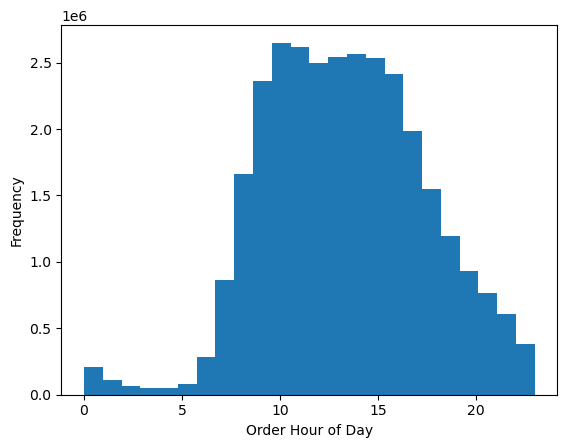

In [10]:
#place order counts into bins by hour of the day
hour_bar = ords_prods_customers_target['order_hour_of_day'].plot.hist(bins=24)
hour_bar.set_xlabel('Order Hour of Day')

In [12]:
# The most popular hours are between 9AM and 3PM

In [14]:
#Export to visualization
hour_bar.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'hour_bar.png'), bbox_inches = 'tight')

## Busiest day of the week

Text(0.5, 0, 'Order Day of the Week')

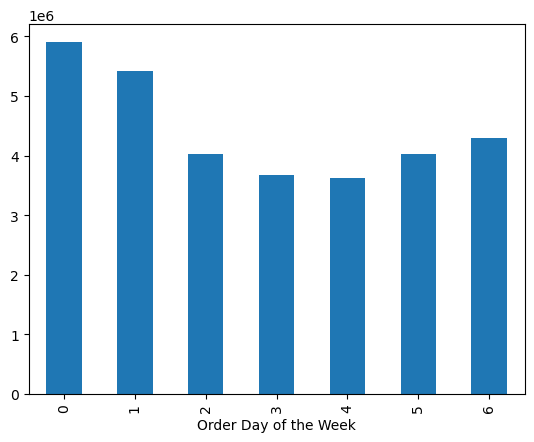

In [17]:
#plot a bar chart by day of the week
dow_bar = ords_prods_customers_target['orders_day_of_week'].value_counts().sort_index().plot.bar()
dow_bar .set_xlabel('Order Day of the Week')

In [19]:
# According to the chart the most popular days are Saturday and Sunday

In [21]:
# export the chart 
dow_bar.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'dow_bar.png'), bbox_inches = 'tight')

## When do customers spend the most money?


In [24]:
#first splot up the data to make the information easier to process

In [26]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customers_target)) <= 0.7

In [28]:
analysis_small = ords_prods_customers_target[~dev]

In [30]:
#put only the needed info for this analysis into a data frame
price_down_df = analysis_small[['orders_day_of_week','prices']]

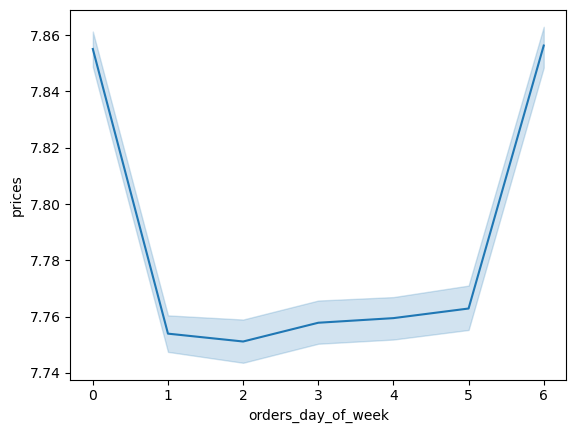

In [32]:
#create the line chart
price_line = sns.lineplot(data = price_down_df, x = 'orders_day_of_week',y = 'prices')

In [34]:
#According to the chart on Saturday and Friday prices increase. However this is mainly seem because of the range of the y axis
# The actual change in prices is between $7.74 and $7.86 and is minimal


In [40]:
#run the same chart for hour of day
price_hod_df = analysis_small[['order_hour_of_day','prices']]

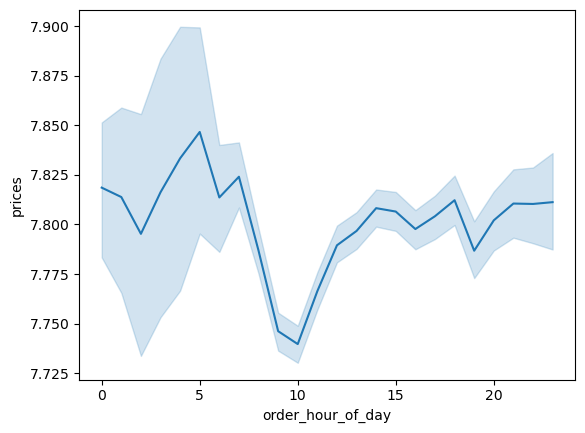

In [42]:
price_line_hod = sns.lineplot(data = price_hod_df, x = 'order_hour_of_day',y = 'prices')

In [44]:
#according to the chart customers are slighly more likely to pay higher prices earlier in the day between midnight and 5 AM

In [46]:
#export the chart
price_line.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'dow_price_line.png'), bbox_inches = 'tight')
price_line_hod.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'hod_price_line.png'), bbox_inches = 'tight')

In [48]:
# what is the appropriatge price range grouping

In [50]:
list(ords_prods_customers_target.columns)

['order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'busiest_day',
 'busiest_hours',
 'max_order',
 'loyalty_flag',
 'avg_product_order',
 'spender_flag',
 'med_days_since_order',
 'frequency_flag',
 'gender',
 'state',
 'age',
 'date_joined',
 'dependant_count',
 'fam_status',
 'income',
 'region',
 'activity_flag',
 'age_cohort',
 'income_range',
 'department_type',
 'family_type']

<Axes: ylabel='Frequency'>

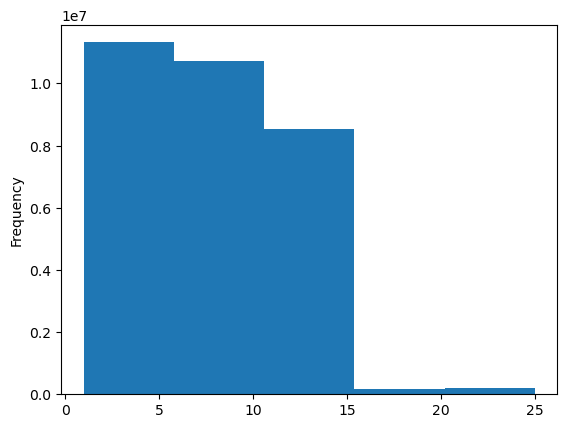

In [52]:
#For this I will examine prince range bins to see which is appropraite 
ords_prods_customers_target['prices'].plot.hist(bins = 5)

In [54]:
#This seems to be too large and does not offer analytial insight

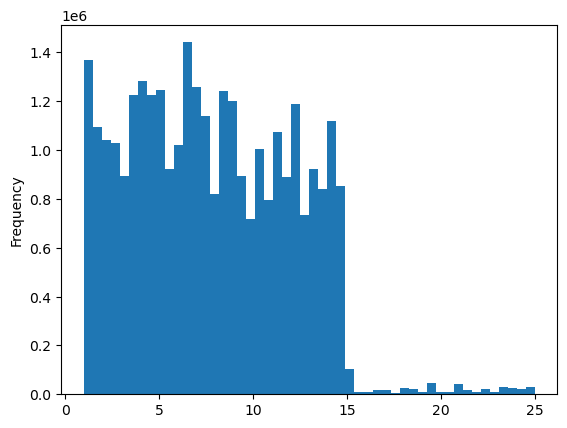

In [56]:
price_bin = ords_prods_customers_target['prices'].plot.hist(bins = 50)

In [58]:
#Though 50 bins may seem to be too large it does offer analytic insights
# Product purchase drop off after $15
# There is a difference in price in $.5 increments. For example, prices spike around $6.oo then fall, but pick up again around $8.00
#when pricing and promoting products do so with products that are within $.50 of each other

In [60]:
#export the data 
price_bin.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'prince_bin.png'), bbox_inches = 'tight')

## What departments are the most popular

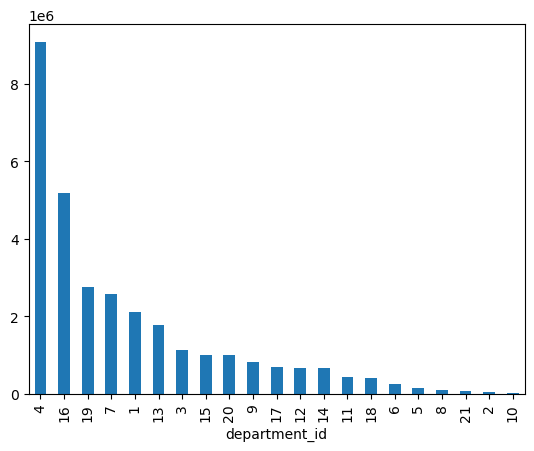

In [62]:
dept_id_bar = ords_prods_customers_target['department_id'].value_counts().sort_values(ascending=False).plot.bar()

In [64]:
#according to the rept the 4th and 16th department are the most popular. Which is the produce and dairy and eggs department

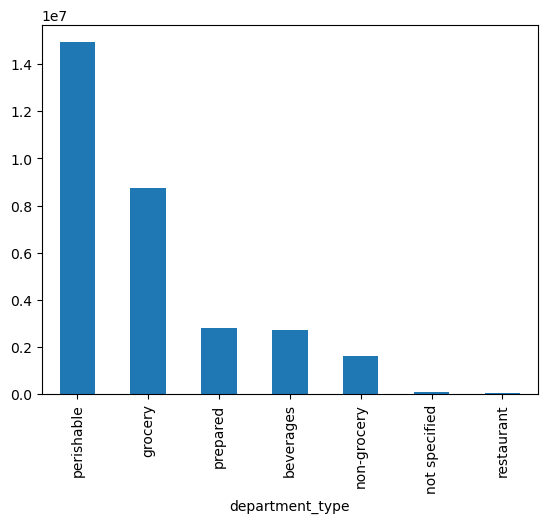

In [66]:
#You can also view this with aggregated data
dept_type_bar = ords_prods_customers_target['department_type'].value_counts().sort_values(ascending=False).plot.bar()

In [68]:
#this grouping also shows that grocery items are the most popular with Instacart's customer base

In [70]:
#export the charts 
dept_type_bar.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'dept_type_bar.png'), bbox_inches = 'tight')
dept_id_bar.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'dept_id_bar.png'), bbox_inches = 'tight')

In [72]:
# What’s the distribution among users in regards to their brand loyalty 
#For this question I will create a crosstab of loyalty and frequency to see who visits the most frequently 

loyalty_crosstab = pd.crosstab(ords_prods_customers_target['loyalty_flag'], ords_prods_customers_target['frequency_flag'], dropna = False)


In [74]:
loyalty_crosstab.head()

frequency_flag,Frequent,Non-Frequent,Regular
loyalty_flag,,,
Loyal customer,10281575,0,2518
New customer,1660202,1526642,1616851
Regular customer,10267117,660775,4948884


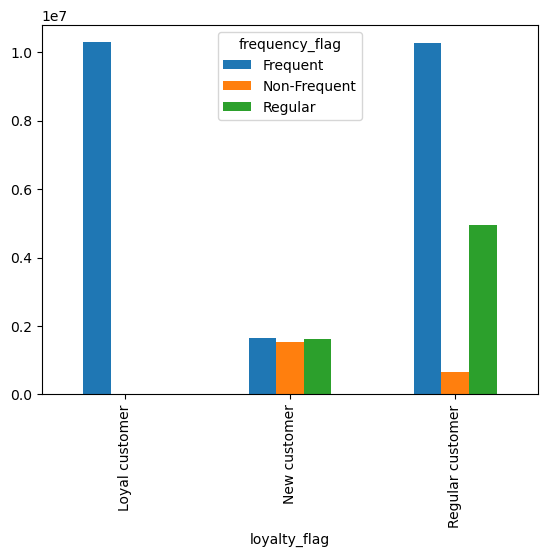

In [76]:
#create a bar chart with the loyalty info
loyalty_frequency_bar = loyalty_crosstab.plot.bar()


In [78]:
#from the chart it is clear that loyal customers are the most frequent buyers. Also interesting is that there is a subset of regular customers that are both frequent and regular buyers
#these are the best customers to target to turn them into loyal customers


In [80]:
#export the chart
loyalty_frequency_bar.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'loyalty_frequency_bar.png'), bbox_inches = 'tight')

In [82]:
#is there a difference in ordering habits based on customer type.
#for this I will look at department type with loyalty type
#to start creating a cross tab with department type and loyalty
#since the different groups order at different amounts I'm not to look at the percent of the total to see if there are differences.
loyalty_department_crosstab = pd.crosstab(ords_prods_customers_target['loyalty_flag'], ords_prods_customers_target['department_type'], dropna = False,  normalize='index')

In [83]:
loyalty_department_crosstab.head()

department_type,beverages,grocery,non-grocery,not specified,perishable,prepared,restaurant
loyalty_flag,,,,,,,
Loyal customer,0.086905,0.265320,0.049865,0.002826,0.503745,0.089993,0.001345
New customer,0.088531,0.302648,0.055405,0.003862,0.457798,0.090892,0.000864
Regular customer,0.088022,0.288386,0.053452,0.003248,0.475635,0.090283,0.000974


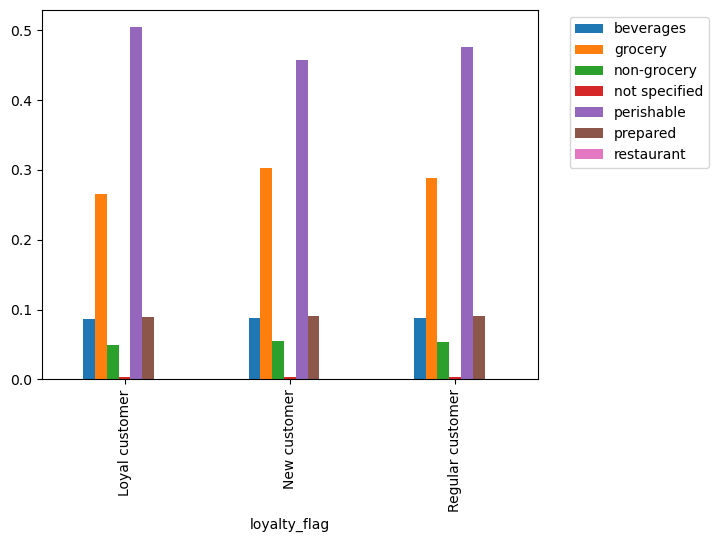

In [86]:
#create the bar chart
loyalty_department_bar = loyalty_department_crosstab.plot.bar()
loyalty_department_bar.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [88]:
#for the most part the different customer groups order the same types of products. It is also interesting to note perishable items are the most popular.

In [90]:
#export the bar chart
loyalty_frequency_bar.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'loyalty_frequency_bar.png'), bbox_inches = 'tight')

In [92]:
#ordering habits by region

In [94]:
region_department_crosstab = pd.crosstab(ords_prods_customers_target['region'], ords_prods_customers_target['department_type'], dropna = False,  normalize='index')

In [96]:
region_department_crosstab.head()

department_type,beverages,grocery,non-grocery,not specified,perishable,prepared,restaurant
region,,,,,,,
Midwest,0.087175,0.283039,0.052949,0.003243,0.482663,0.089840,0.001092
Northeast,0.089291,0.282130,0.053034,0.003254,0.480575,0.090692,0.001025
South,0.088083,0.282545,0.052562,0.003236,0.482450,0.090040,0.001084
West,0.086705,0.283913,0.051889,0.003089,0.482586,0.090716,0.001103


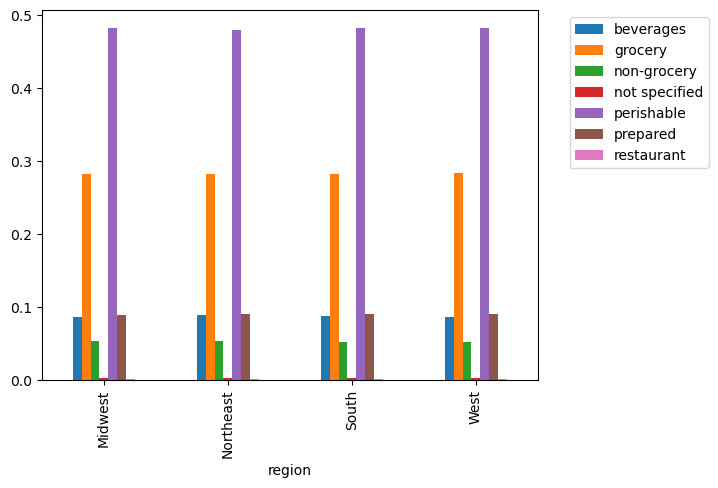

In [98]:
#create the bar chart
region_department_bar = region_department_crosstab.plot.bar()
region_department_bar.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [100]:
#no regional difference are detected in the types of products ordered

In [102]:
#ordering habits by age and family status 

In [104]:
#create the cross tab
age_family_crosstab = pd.crosstab(ords_prods_customers_target['fam_status'], ords_prods_customers_target['age_cohort'], dropna = False)

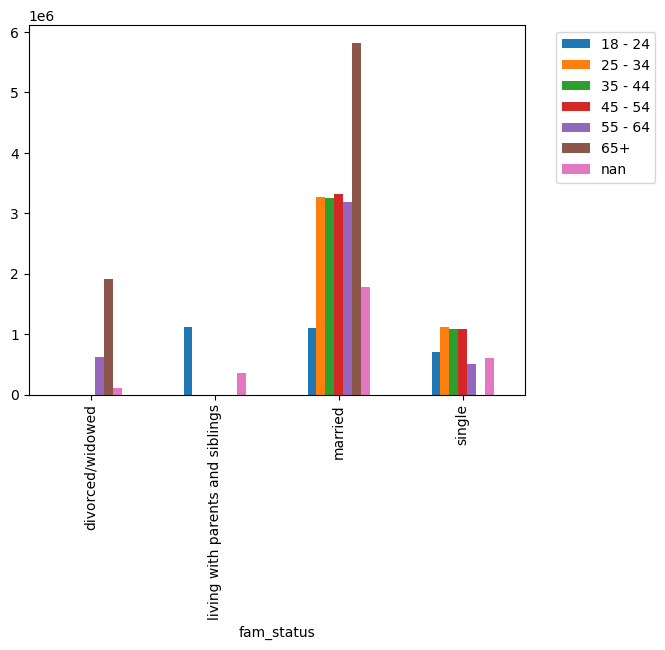

In [106]:
age_family_bar = age_family_crosstab.plot.bar()
age_family_bar.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [108]:
#from this it is clear that married individuals over 65 are making the most of the orders.


In [110]:
#download the chart
age_family_bar.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'age_family_bar.png'), bbox_inches = 'tight')

In [112]:
#create a cross tab for age and dependant
age_dependant_crosstab = pd.crosstab(ords_prods_customers_target['dependant_count'], ords_prods_customers_target['age_cohort'], dropna = False)

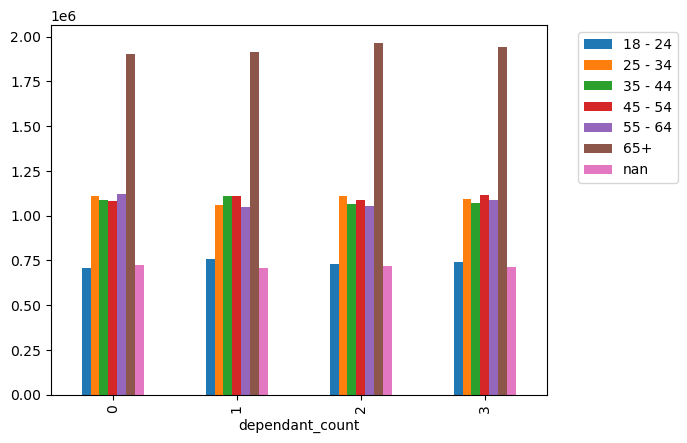

In [114]:
#Create the bar plot 
age_dependant_bar = age_dependant_crosstab.plot.bar()
age_dependant_bar.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [116]:
#dependant count doesn't seem to impact ordering

In [118]:
#export the chart
age_dependant_bar.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'age_dependant_bar.png'), bbox_inches = 'tight')

In [120]:
#income range and age
age_income_crosstab = pd.crosstab(ords_prods_customers_target['income_range'], ords_prods_customers_target['age_cohort'], dropna = False)

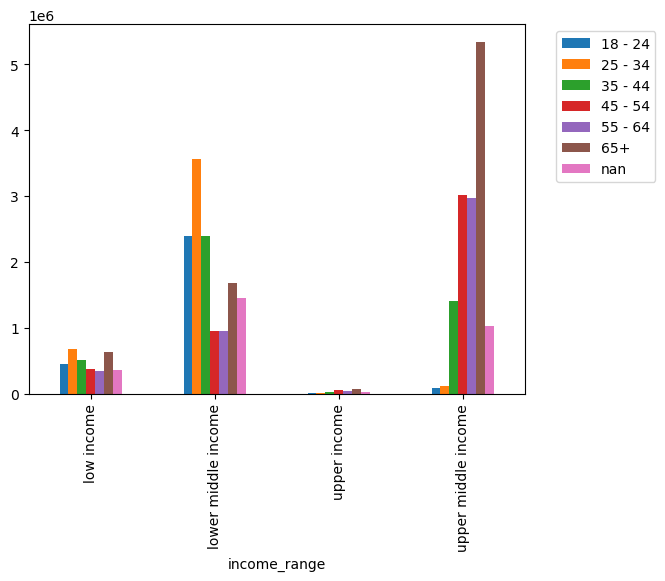

In [122]:
age_income_bar = age_income_crosstab.plot.bar()
age_income_bar.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [124]:
#income range and age does impact ordering frequency with upper middle income age 65+ being the top and 25 - 34 year old lower middle income being the second best target


In [126]:
#export the chart
age_income_bar.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'age_income_bar.png'), bbox_inches = 'tight')

## Answer to what does the demographic data suggest
The data suggests that all customer types are most interested in perishable goods.
The most salient factors in ordering and marital status, age, and income. Region and dependents and customer type does not impact ordering

## What differences can you find in ordering habits of different customer profiles?

In [9]:
#group by family type age range and income to see customer orders.
#I will then analyze ordering patters of the demographics identified above to see if I can dray any conclusions
customer_profile = ords_prods_customers_target.groupby(
    ['income_range', 'age_cohort', 'fam_status']
).agg({'order_id': 'count'}).reset_index()

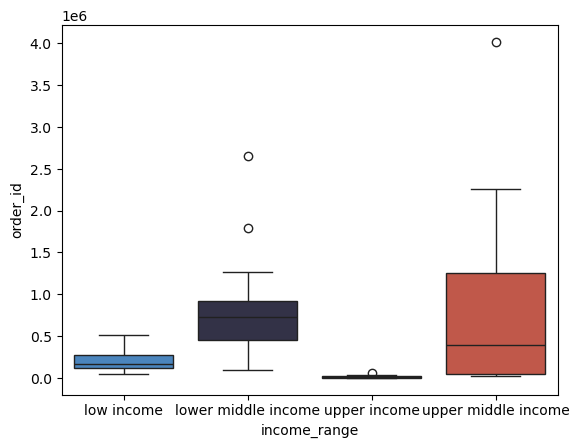

In [11]:
income_range_box = sns.boxplot(
    data=customer_profile, 
    x='income_range', 
    y='order_id', 
    hue='income_range', 
    palette='icefire'
    
    
)


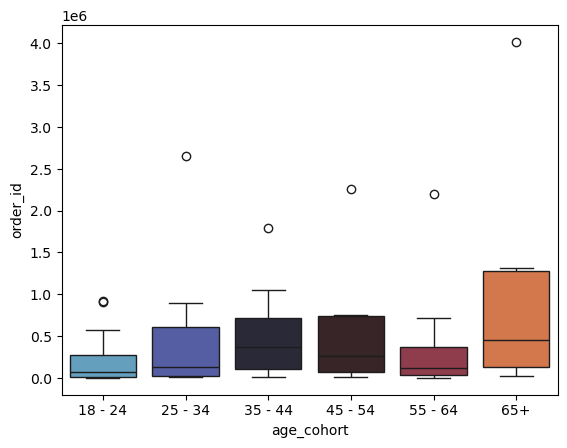

In [17]:
age_cohort_box = sns.boxplot(
    data=customer_profile, 
    x='age_cohort', 
    y='order_id', 
    hue='age_cohort', 
    palette='icefire'
)
    

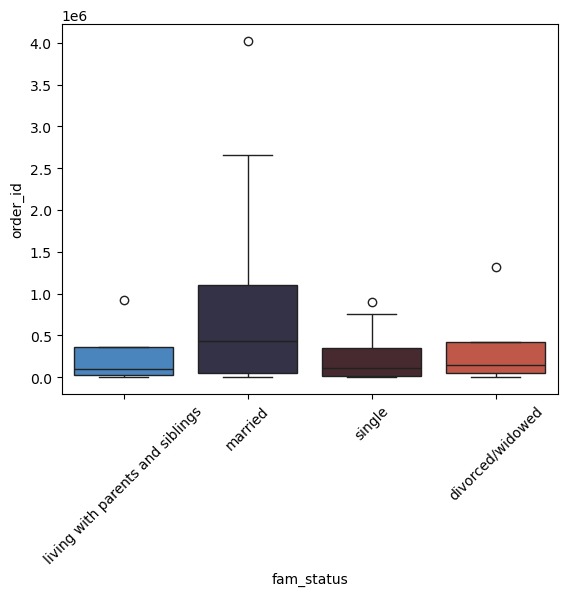

In [13]:
fam_status_box = sns.boxplot(
    data=customer_profile, 
    x='fam_status', 
    y='order_id', 
    hue='fam_status', 
    palette='icefire'
)
plt.xticks(rotation=45)
plt.show()

In [140]:
#the charts show what has already been seen through other visualizations that married individuals 65+ who are upper middle income are Instacart primary audeince

In [19]:
#Export the charts
fam_status_box.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'fam_status_order_box.png'), bbox_inches = 'tight')
age_cohort_box.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'age_cohort_order_box.png'), bbox_inches = 'tight')
income_range_box.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'income_range_order_box.png'), bbox_inches = 'tight')

In [144]:
customer_profile_age = ords_prods_customers_target.groupby(
    ['age_cohort' , 'user_id']
).agg({'prices': 'median'}).reset_index()

In [146]:
customer_profile_age.head()

,age_cohort,user_id,prices
0,18 - 24,49,7.6
1,18 - 24,55,6.4
2,18 - 24,79,9.2
3,18 - 24,83,4.9
4,18 - 24,116,9.1


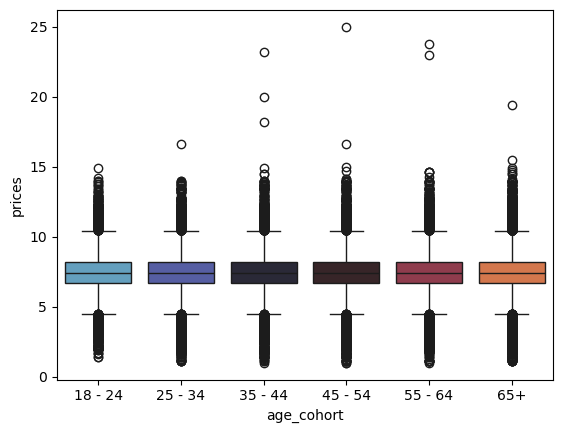

In [148]:
age_cohort_box = sns.boxplot(
    data=customer_profile_age, 
    x='age_cohort', 
    y='prices', 
    hue='age_cohort', 
    palette='icefire'
)

In [150]:
customer_profile_income = ords_prods_customers_target.groupby(
    ['income_range' , 'user_id']
).agg({'prices': 'median'}).reset_index()

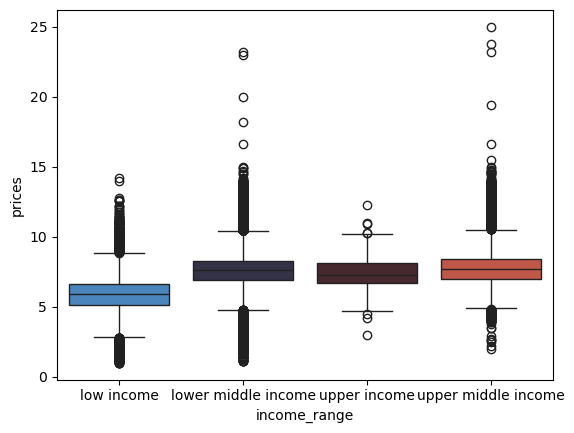

In [152]:
income_profile_box = sns.boxplot(
    data=customer_profile_income, 
    x='income_range', 
    y='prices', 
    hue='income_range', 
    palette='icefire'
)

In [154]:
customer_profile_fam_status = ords_prods_customers_target.groupby(
    ['fam_status' , 'user_id']
).agg({'prices': 'median'}).reset_index()

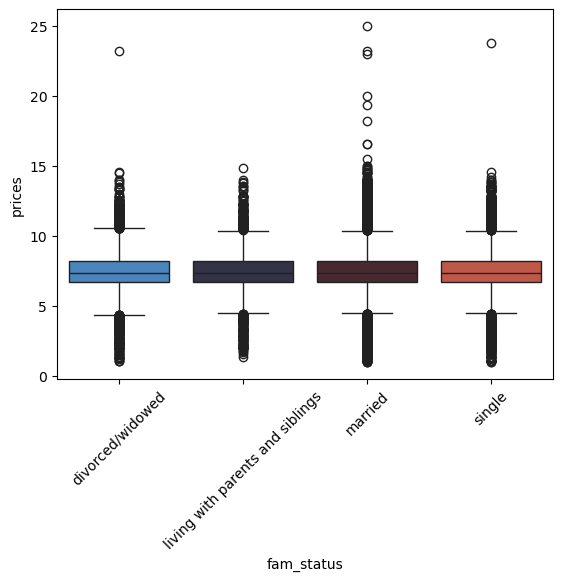

In [158]:
fam_status_profile_box = sns.boxplot(
    data=customer_profile_fam_status, 
    x='fam_status', 
    y='prices', 
    hue='fam_status', 
    palette='icefire'
)

plt.xticks(rotation=45)
plt.show()

In [160]:
#export the bar chart
fam_status_profile_box.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'fam_status_profile_box.png'), bbox_inches = 'tight')
income_profile_box.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'income_profile_box.png'), bbox_inches = 'tight')
age_cohort_box.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'age_cohort_box.png'), bbox_inches = 'tight')